<a href="https://colab.research.google.com/github/cyongkypranowo/DeepLearning-Diabetes-Disease-Prediction/blob/main/DL_Diabetes_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Diabetes Disease Prediction
##### Industri : Healthcare

## Objective
Sistem cerdas yang mampu mendeteksi potensi penyakit diabetes pada pasien wanita di Amerika Utara (Pima Indians).

Sumber Data : [link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

# 1. Business & Data Understanding

## Business Understanding

### Latar Belakang Proyek

Di Indonesia, industri healthcare terus berkembang dan mengintegrasikan teknologi terkini untuk meningkatkan diagnosis dan perawatan. Sistem cerdas untuk prediksi diabetes sangat penting karena dapat memberikan deteksi dini, memungkinkan intervensi lebih cepat untuk mencegah komplikasi serius.

1. **Manfaat** : Deep learning mampu memproses dan belajar dari set data kesehatan yang kompleks, meningkatkan akurasi diagnostik penyakit diabetes dibandingkan metode tradisional. Ini memungkinkan deteksi dini dan lebih akurat dari kondisi prediabetes dan diabetes.
2. **Harapan** : Penelitian ini juga dapat membuka jalan untuk penelitian lebih lanjut dalam penerapan teknologi AI dan machine learning dalam bidang medis lainnya, mendorong inovasi dalam diagnosa dan perawatan penyakit.

### Tujuan Proyek
Untuk mengembangkan dan mengimplementasikan sistem prediksi penyakit diabetes yang akurat dan efisien menggunakan teknologi deep learning, guna meningkatkan deteksi dini dan personalisasi perawatan bagi pasien diabetes.

## Data Understanding

### Deskripsi Dataset

Dataset ini terdiri dari 768 baris dengan 9 kolom, yang mencakup:

* Pregnancies: Jumlah kehamilan.
* Glucose: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral.
* BloodPressure: Tekanan darah diastolik (mm Hg).
* SkinThickness: Ketebalan lipatan kulit trisep (mm).
* Insulin: Insulin serum 2 jam (mu U/ml).
* BMI: Indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2).
* DiabetesPedigreeFunction: Fungsi silsilah diabetes, sebuah skor yang * merefleksikan kemungkinan genetik diabetes berdasarkan riwayat keluarga.
* Age: Umur dalam tahun.
* Outcome: Variabel kelas yang menandakan apakah subjek memiliki diabetes (1) atau tidak (0).

In [17]:
# Call library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [2]:
# Memuat dataset
df = pd.read_csv('diabetes.csv')

In [3]:
# Menampilkan 5 baris pertama untuk melihat struktur datanya
print("Struktur Data:")
print(df.head(10))

Struktur Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3               

In [4]:
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0

In [5]:
# Informasi Dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Ukuran Dataset
print("\nUkuran Dataset:")
print(df.shape)


Ukuran Dataset:
(768, 9)


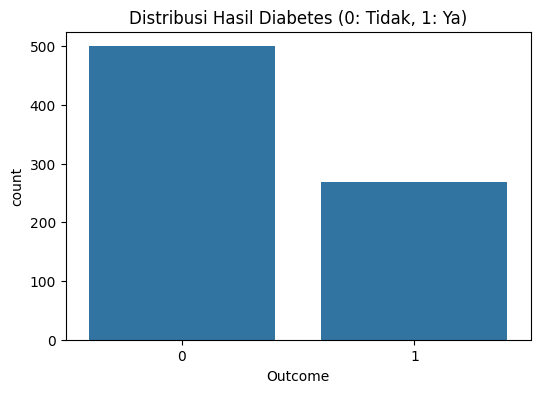

In [7]:
# Distribusi Outcome (Hasil)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Hasil Diabetes (0: Tidak, 1: Ya)')
plt.show()

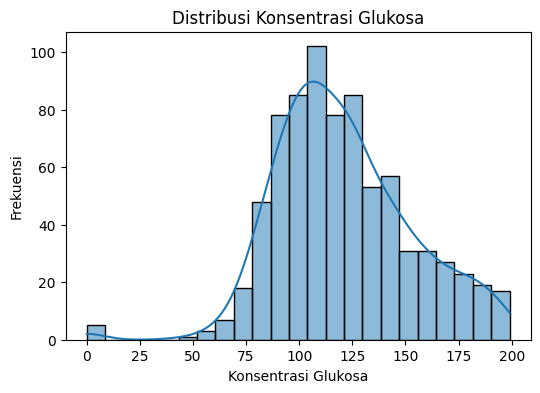

In [8]:
# Distribusi Glukosa
plt.figure(figsize=(6, 4))
sns.histplot(df['Glucose'], kde=True)
plt.title('Distribusi Konsentrasi Glukosa')
plt.xlabel('Konsentrasi Glukosa')
plt.ylabel('Frekuensi')
plt.show()

# 2. Data Cleaning & Analysis

In [9]:
# Kolom yang perlu dihandle nilai 0-nya
columns_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [10]:
# Ganti nilai 0 dengan median
for column in columns_to_replace_zero:
    df[column] = df[column].replace(0, df[column].median())

In [11]:
# Mengecek ulang statistik deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Analysis Data
Setelah mengganti nilai 0 dengan median pada kolom **Glucose, BloodPressure, SkinThickness, Insulin, dan BMI**, kita dapat melihat beberapa perubahan dalam statistik deskriptif dataset:

1. **Mean (Rata-rata):**
Rata-rata untuk Glucose, BloodPressure, SkinThickness, Insulin, dan BMI kini lebih mewakili data karena tidak lagi terdampak oleh nilai 0 yang tidak realistis. Misalnya, rata-rata Insulin meningkat dari nilai sebelumnya menjadi 94.65, mengindikasikan penggantian nilai 0 dengan median memberikan representasi yang lebih akurat terhadap distribusi insulin dalam dataset.

2. **Std (Standar Deviasi):**
Standar deviasi untuk kolom yang diubah mengalami penyesuaian, menunjukkan variasi dalam data yang sebenarnya setelah penggantian nilai 0. Perubahan ini penting karena menunjukkan sebaran data yang lebih realistis.

3. **Min (Minimum)**:
Nilai minimum untuk kolom tersebut sekarang lebih realistis dan tidak lagi 0, yang menunjukkan bahwa penggantian nilai telah berhasil mengeliminasi nilai-nilai yang tidak mungkin secara klinis.

4. **Median**:
Median (50%) tidak berubah untuk beberapa kolom karena penggantian nilai 0 dengan median tidak mempengaruhi nilai tengah distribusi, kecuali jika sebagian besar data pada kolom tersebut adalah 0.

5. **Perubahan pada Q1 dan Q3 (Kuartil 1 dan 3):**
Kuartil pertama dan ketiga menunjukkan bagaimana sebaran data terbagi sebelum dan setelah titik median. Perubahan pada kuartil menunjukkan penyesuaian dalam distribusi data setelah nilai 0 diganti.
Analisis ini menunjukkan bahwa penggantian nilai 0 dengan median telah membantu dalam memperbaiki kualitas dataset dengan mengeliminasi nilai-nilai yang tidak mungkin secara klinis, yang dapat meningkatkan kinerja model prediktif yang akan dibangun

## Transformation Data

In [12]:
# Membagi dataset menjadi fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Modeling

In [13]:
# Definisi kelas dataset
class DiabetesDataset(Dataset):
    def __init__(self, features, labels):
        # Pastikan 'labels' adalah numpy array sebelum konversi ke tensor.
        if not isinstance(labels, np.ndarray):
            labels = labels.to_numpy()  # Jika 'labels' adalah pandas Series.

        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


In [14]:
# Narrow and Shallow
class NarrowShallowModel(nn.Module):
    def __init__(self):
        super(NarrowShallowModel, self).__init__()
        self.fc = nn.Linear(X_train.shape[1], 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc(x))
        return x

# Narrow and Wide
class NarrowWideModel(nn.Module):
    def __init__(self):
        super(NarrowWideModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Deep and Wide
class DeepWideModel(nn.Module):
    def __init__(self):
        super(DeepWideModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

## Training & Evaluate Model

In [15]:
def train_model(model, train_loader, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

def evaluate_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            predicted = (y_pred > 0.5).float()
            y_true.extend(y_batch.view(-1).tolist())
            y_pred_list.extend(predicted.view(-1).tolist())
    return y_true, y_pred_list


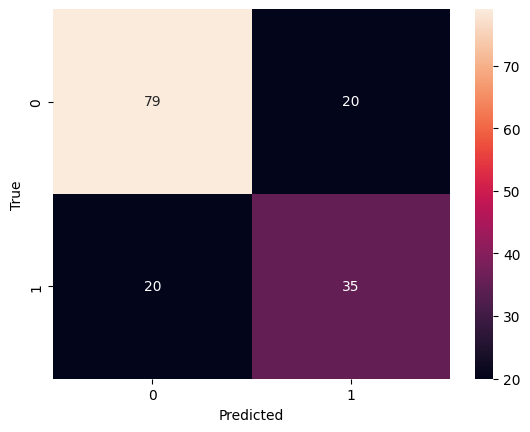

In [18]:
# Inisialisasi DataLoader
train_loader = DataLoader(DiabetesDataset(X_train_scaled, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(DiabetesDataset(X_test_scaled, y_test), batch_size=32, shuffle=False)

# Inisialisasi model, kriteria loss, dan optimizer
model = NarrowWideModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Pelatihan model
train_model(model, train_loader, criterion, optimizer, epochs=100)

# Evaluasi model
y_true, y_pred_list = evaluate_model(model, test_loader)
cm = confusion_matrix(y_true, y_pred_list)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
